# SDGRegressor to Predict Crowdness at the Gym

I love going to the Gym, however, I hate it when it's crowded because I cannot follow my plan at my rythm. I often have to wait for the machine I need to free up, and it becomes next to impossible to follow my routine.

Because of this, I decided to build a predictive model using Machine Learninhg, especifically a linear regressor using Stochastic Gradient Decsent.

Using a dataset with over 60,000 observations and 11 featres including day, hour, temperature and other details, I will be creating a model that can predict how many people will be at the gym at a particular day and time. That way, I will be able to enjoy my excersise routine without waiting times.

In [23]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
gym = pd.read_csv('data.csv')

In [3]:
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
gym.shape

(62184, 11)

In [5]:
gym.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [6]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [7]:
gym.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


We will drop the data column as it is an object and we have other columns giving us date

In [8]:
gym = gym.drop('date', axis=1)

In [9]:
gym.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


### Plots

Now I am ready to do some EDA (Exploratory Data Analysis).

I will start by doing Univariate Analysis on some of the features. This means we will take a deeper look at the distributions of specific features.

I will plot histograms for the month, day and hour, since they probably have the largest influence on the ammount of people.

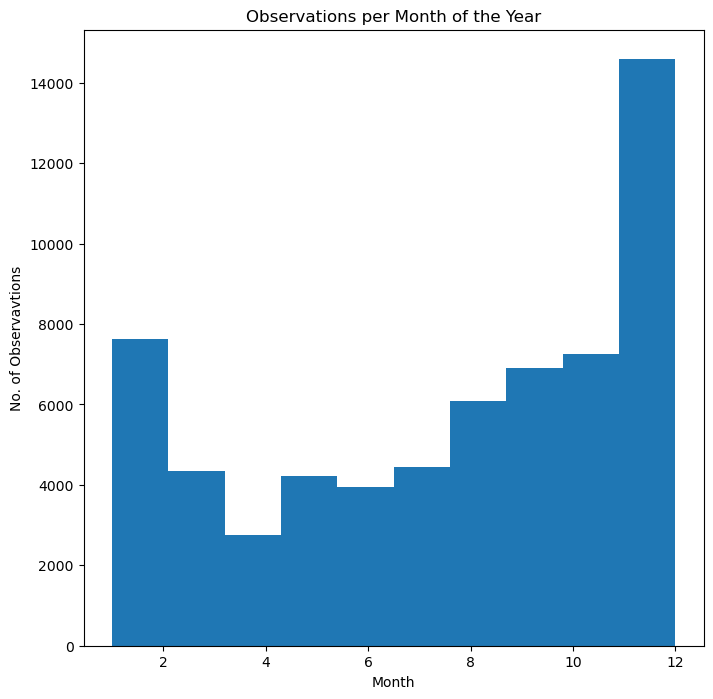

In [10]:
plt.figure(figsize=(8, 8))

plt.hist(gym['month'])
plt.title("Observations per Month of the Year")
plt.xlabel('Month')
plt.ylabel('No. of Observavtions')
plt.show()

Here we can see that December and January are the months with the most observations, probably because they are the most popular months to go to the gym. We can also see more obervations at the begining of the semester (August), then at the end, probably because everyone is very excited at the beginning and very busy at the end (March, April).

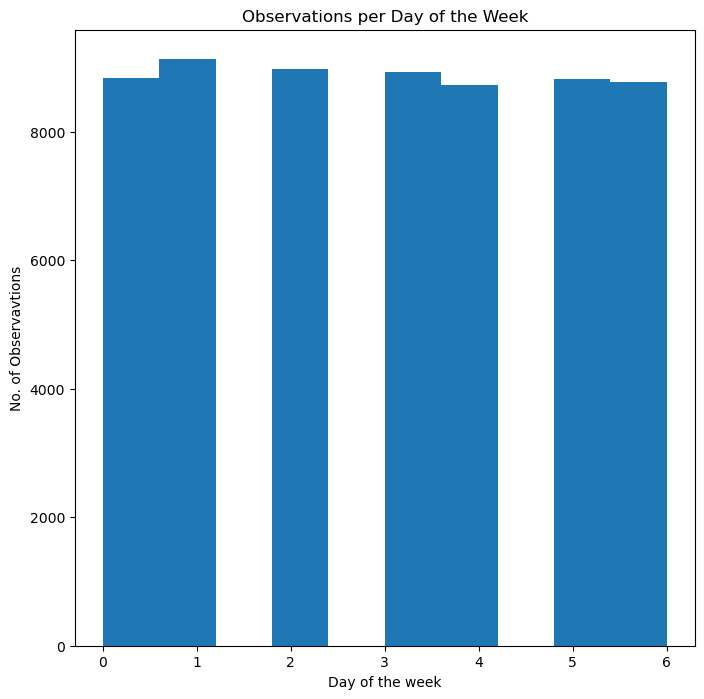

In [11]:
plt.figure(figsize=(8, 8))

plt.hist(gym['day_of_week'])
plt.title("Observations per Day of the Week")
plt.xlabel('Day of the week')
plt.ylabel('No. of Observavtions')
plt.show()

Not a lot of information here, except that there is not a huge diference in the number of observations for each day of the week. Tuesday (1) seems to be the most common day, but not by much.

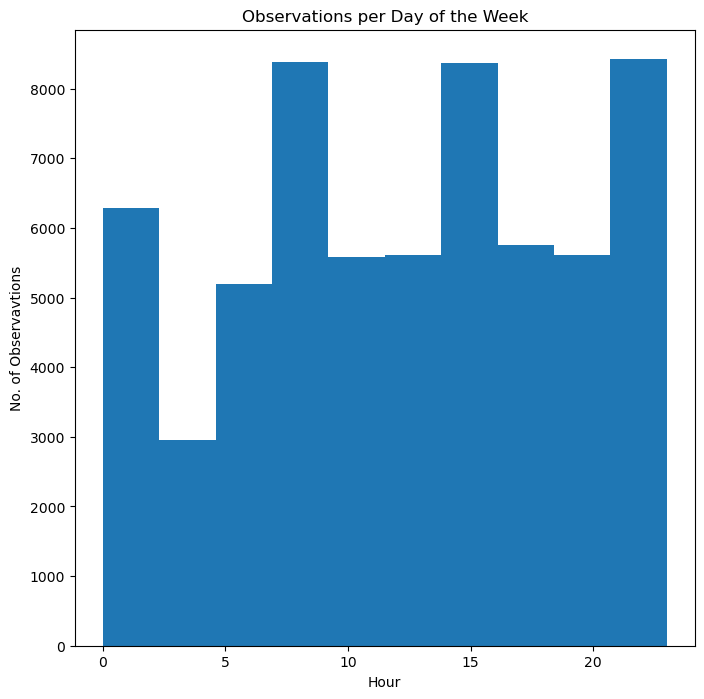

In [15]:
plt.figure(figsize=(8, 8))

plt.hist(gym['hour'])
plt.title("Observations per Day of the Week")
plt.xlabel('Hour')
plt.ylabel('No. of Observavtions')
plt.show()

This is much more interesting, but just in case, there are a lot of observations at early morning and mid afternoon, which is expected, but the one at midnight are a surprise. Seems like there are night owls going to the gym.

This is interesting, but since I am building a model to predict the amount of people (target variable), I can get more information from using Bivariate Analysis, meaning we confront two variables at the same time to see if there is any correlation between them.

Let's plot the relations between month, day and hour compared to the number of people

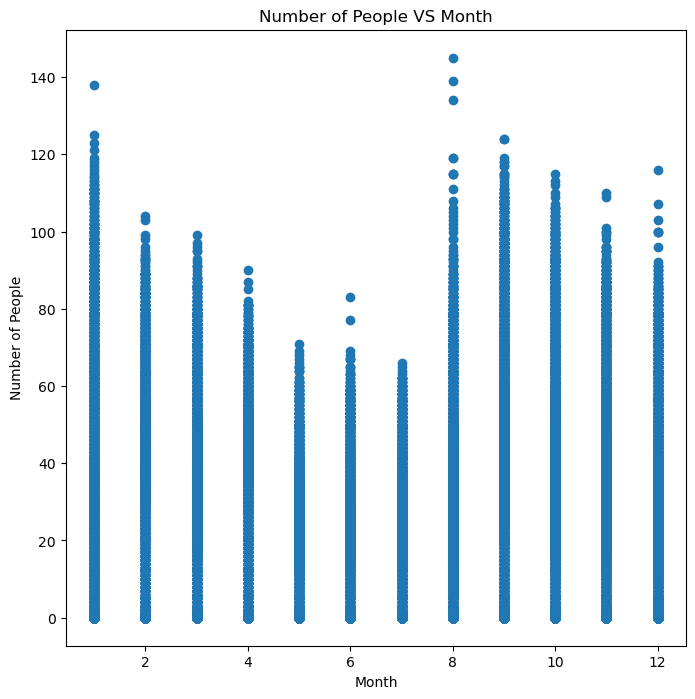

In [16]:
plt.figure(figsize=(8, 8))

plt.scatter(gym['month'], gym['number_people'])
plt.title("Number of People VS Month")
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.show()


A clearer version of the relationship. We can see again that August and January are the months with the bigger peaks of people, and once again, that the begining of the semester has larger peaks than the end of it.

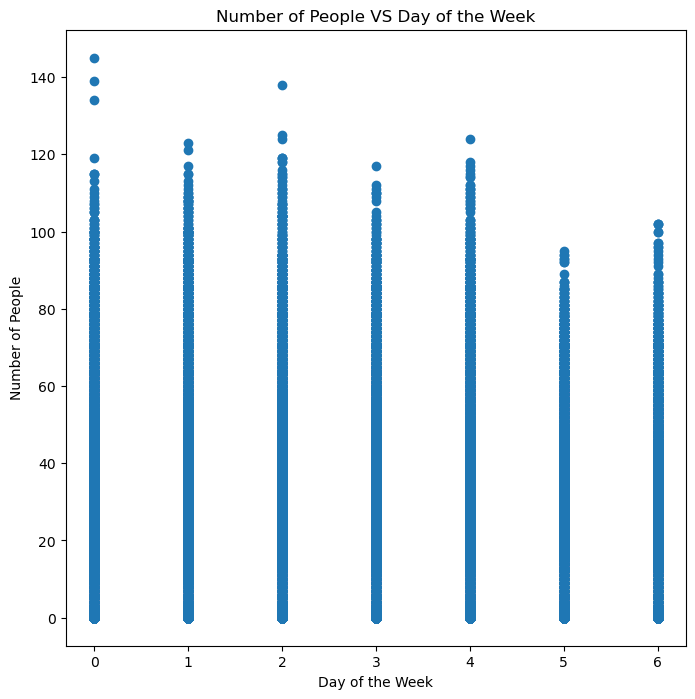

In [17]:
plt.figure(figsize=(8, 8))

plt.scatter(gym['day_of_week'], gym['number_people'])
plt.title("Number of People VS Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.show()

Here we can now see the largest peaks on Monday and Wednesday. And the lower peaks on Saturdays.

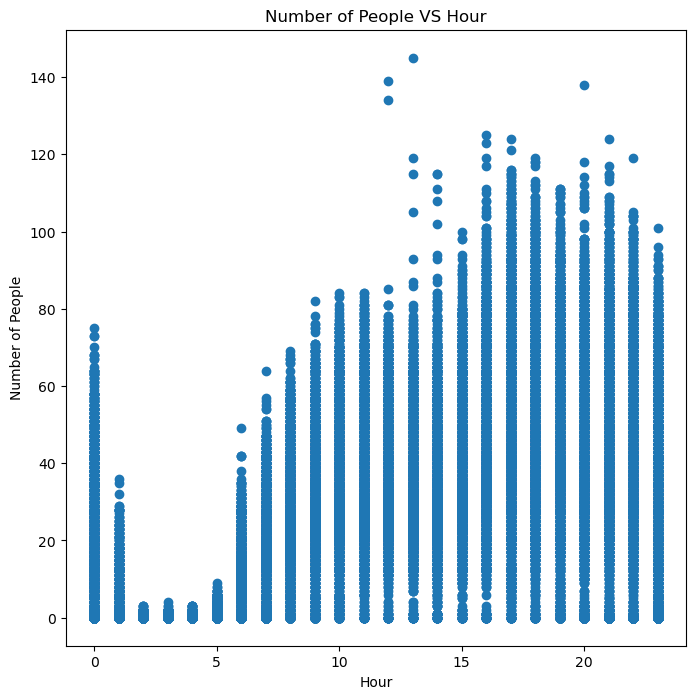

In [18]:
plt.figure(figsize=(8, 8))

plt.scatter(gym['hour'], gym['number_people'])
plt.title("Number of People VS Hour")
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.show()

Now we can see a lot clearer, that the largest peaks of people are during the afternoon, evening, and still surprising, large peaks late at night. ALso we see very small peaks from 2am to 5am.

I can go on with each variable, but to make it short, I will use a set of tools, from correlation tables, pairplots and a heatmap, to quickly see the relationship between each variable and out target (number of people).

I will start with the Correlation Table.

In [19]:
gym.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


This table gives is a sense of the correlation (positive or negative), between each factor and each other variable. Since we are mostly interested in the number of people, we can stick to the first column of the table.

We cans see how the **hour**, **temperature** and interestingly the **is_during_semester** variables have the largest weight. Also we can see that the timestamp and hour variables have a very similar weight, wich means they could be redundant.

Other variables have weaker correlations as well, like **is_weekend** and **day_of_week** are negatively correlated which is very interesting.

<AxesSubplot:>

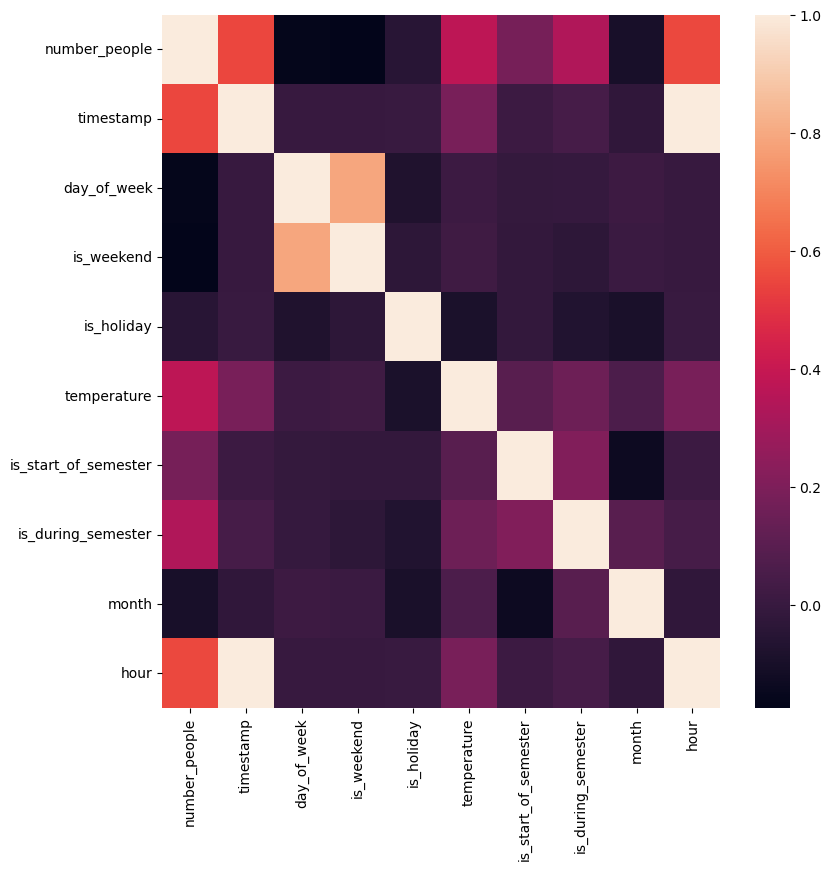

In [21]:
plt.figure(figsize=(9, 9))
sns.heatmap(gym.corr())

This simply confirms our previous suspicions, that **temperature**, **hour** and **is_during_semester** variables are the most important.

Another thing, the **timestamp** seems to be redundant, since it has the same correlation as the **hour**, and we already have all the information on the month, day and time. So I will remove the timestamp column before moving on to building the model.

Also, check with .head() to make sure the column was removed.

In [22]:
gym = gym.drop('timestamp', axis=1)
gym.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


##  Getting ready to build our model with Stochastic Gradient Descent

I need to split the data into train and test sets. I am using a test size of 30% (70% of the data for training and 30% for testing). I am also setting the random state, so as to be able to replicate in the future.

In [24]:
data = gym.values
X = data[:, 1:]
y = data[:, 0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
# Check to make sure the shape of each set is correct.
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Testing label shape: {y_test.shape}")

Training features shape: (43528, 8)
Testing features shape: (18656, 8)
Training label shape: (43528,)
Testing label shape: (18656,)


Build the model object with SGDRegressor. Setting the learning rate to optimal, the loss function to hubber loss and using elasticnet for the penalty.

The fitting the model with the training data. I set the random_state so as to be able to reproduce the training.

In [26]:
sgd_v1 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', penalty='elasticnet', random_state = 52)

In [27]:
sgd_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

### Measure the Performance of the Mode

In [28]:
y_pred_v1 = sgd_v1.predict(X_test)  # Predict labels

In [29]:
# Let's evaluate the performance of the model.

# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v1),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v1),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v1),3)}")

Mean squared error: 254.545
R2 score: 0.506
Mean absolute error: 12.135


The Mean Squared Error and Mean Absolute Error are fairly high (the closer to 0 the higher the accuracy), meaning the model is not incredibly accurate. With the R2 Score we can see there is a correlation of 0.506, wich is not terrible, but not that good either since we want it to be as close to 1 as possible.

To try and improve the model, we can scale the features to normalize them from -1 to 1, this might help improve the model. For this, I will use the standardscaler from scikit learn.

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we can build another model with the scaled data and see if we can improve it.

I am using the same random_state for consistent results.

In [32]:
sgd_v2 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', penalty='elasticnet', random_state = 52)

In [33]:
sgd_v2.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

In [34]:
y_pred_v2 = sgd_v2.predict(X_test_scaled)  # Predict labels

In [35]:
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v2),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v2),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v2),3)}")

Mean squared error: 254.325
R2 score: 0.507
Mean absolute error: 12.049


With the scaled data, the model performs slightly better, decresing the Mean Squared Error and Mean Absolute Error and increasing the R2 score by 0.001.

## Visualizing the Results

To see how our model performs, the best way is to visualize it. Here is the plot from our first model, using line plots with the actual test data on the back and the predicted data on the front. The parts where the plots converge are the points where the model performed well, and the divergence in the plots is where the model performed poorly.

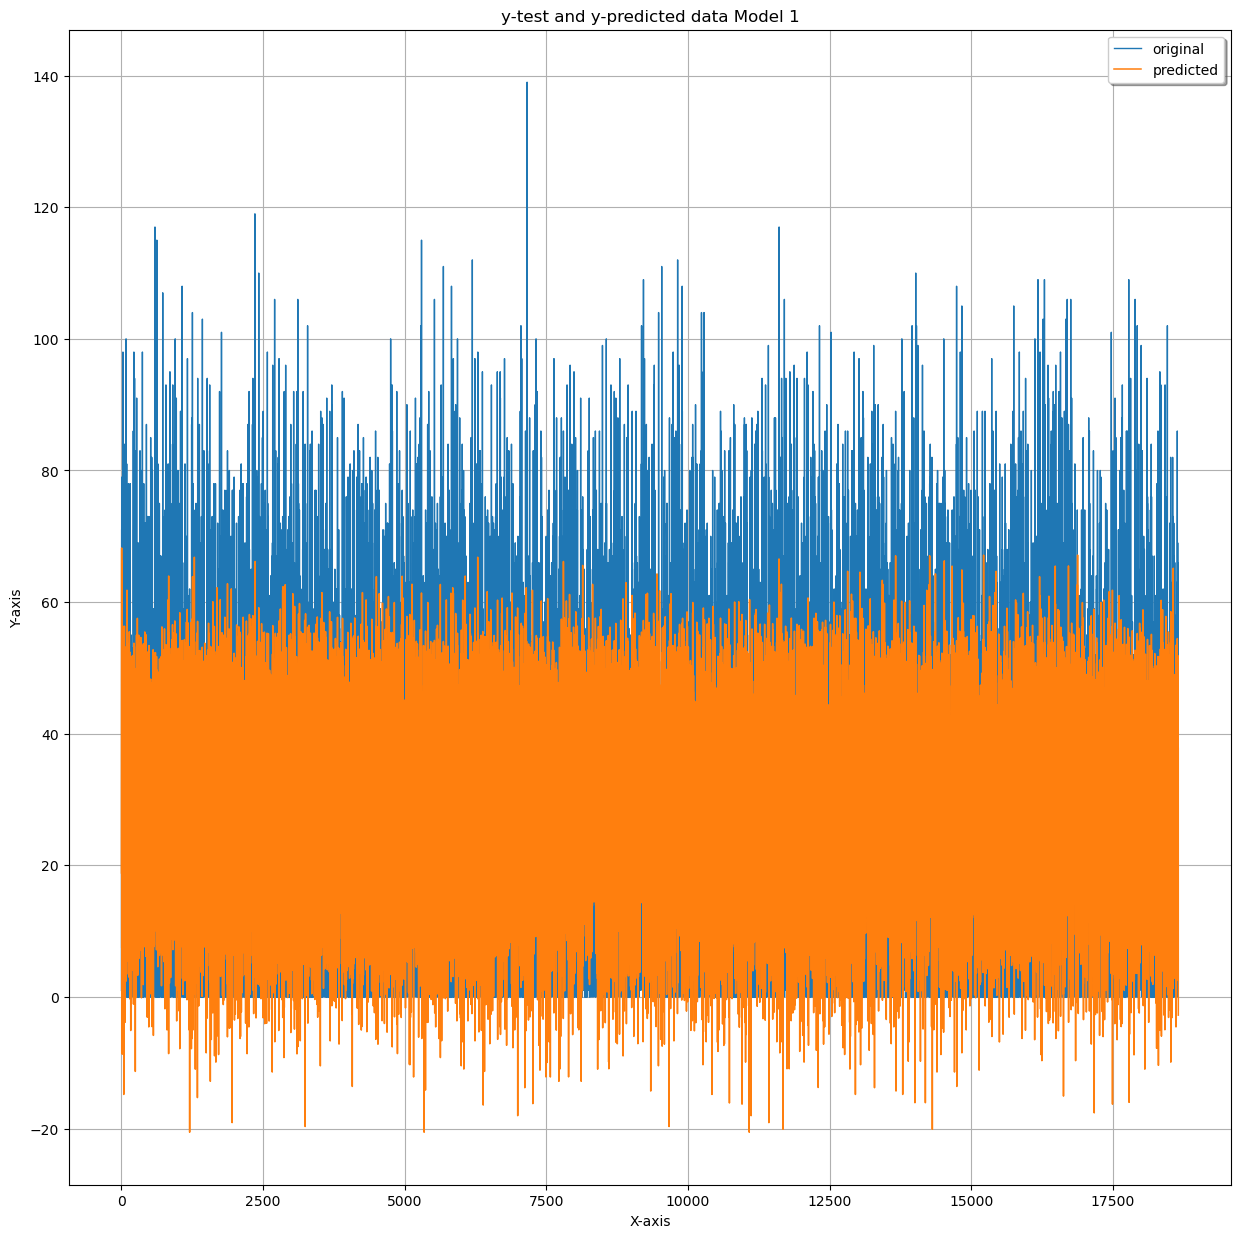

In [36]:
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v1, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 1")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

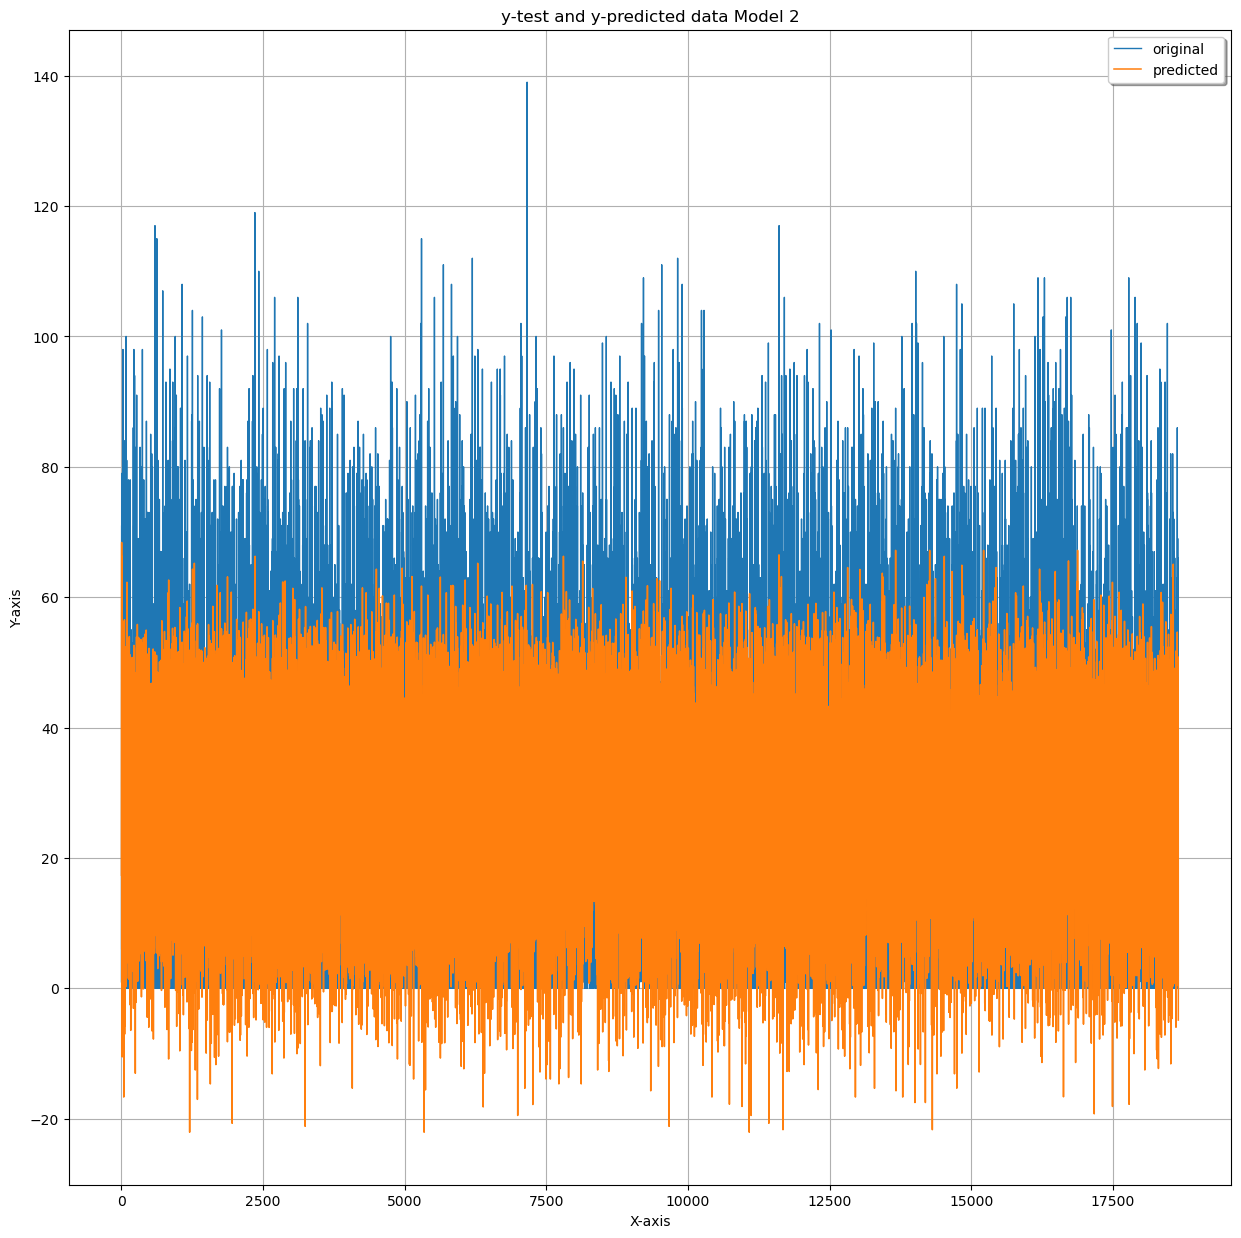

In [37]:
# Model v2

plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 2")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## Summarize your Results
We can clearly see there is a lot of room for improvement. However, a linear regression model using Stochastic Gradient Descent is a good place to start for building such a prediction model.

We can improve the model by making some changes. Regarding the data, I decided to remove the timestamp variable since I believed it to be redundant, nonetheless, maybe that redundancy might help the model get higher accuracy.

Also, I might changing and testing other hyperparameters might be interesting, especially changing the loss function from huber to squared_epsilon_insensitive and maybe exploring changing the learning rate and penalty.

In general, from the data and the model, for someone like me who likes to go to the gym often without having too many people there, any day at 5am seems like a safe bet.